In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

In [3]:
img = cv2.imread("C:/Users/cagla/Downloads/isaretdili.jpg")
cells=img[:,:,0]

In [4]:
pixels_to_um=0.454 #1 pixel =454 nm
ret1,thresh=cv2.threshold(cells,0,1000,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [5]:
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations=2)

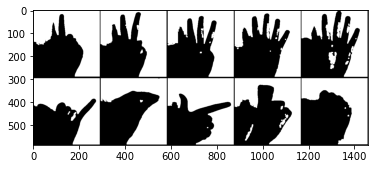

In [6]:
from skimage.segmentation import clear_border
opening= clear_border(opening)
plt.imshow(opening,cmap='gray')

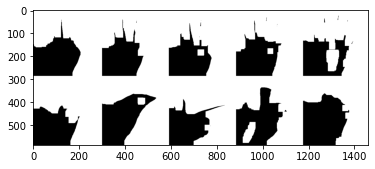

In [7]:
sure_bg=cv2.dilate(opening,kernel,iterations=10)
plt.imshow(sure_bg,cmap='gray')

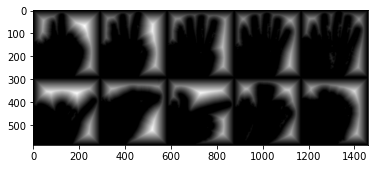

In [8]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.imshow(dist_transform,cmap='gray')

66.0


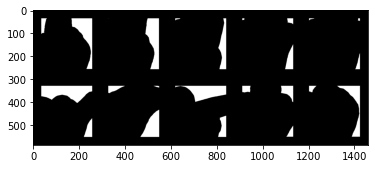

In [9]:
print(dist_transform.max())
ret2,sure_fg=cv2.threshold(dist_transform,0.5*dist_transform.max(),1000,0)
plt.imshow(sure_fg,cmap='gray')


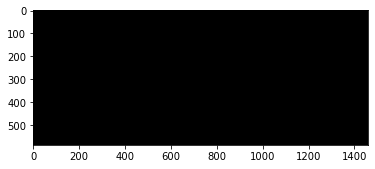

In [10]:
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_bg)
plt.imshow(unknown,cmap='gray')

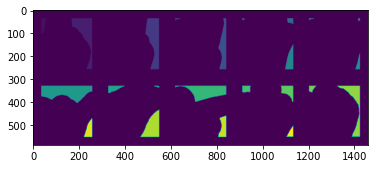

In [11]:
ret3, markers=cv2.connectedComponents(sure_fg)
plt.imshow(markers)

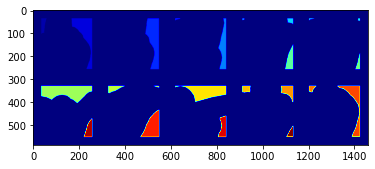

In [12]:
markers=markers+10
markers[unknown==1000]=0
plt.imshow(markers,cmap='jet')

In [14]:
markers=cv2.watershed(img,markers)

In [14]:
result=cv2.imwrite(r'C:/Users/cagla/Downloads/isaretdili3.jpg', opening) 
if result==True:
    print("File saved successfully") 
else: 
    print("Error in saving file")

File saved successfully
